# **Diabetic Health Prediction using Machine Learning**

## **Abstract**

To classsify diabetic health prediction using Machine Learning Algorithms

# **Data**
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# **Objective**
Create a multiclass model to classify several medical variables to predict the diabetic health outcome of a person.

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

### Checking for null values

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Extract input and target(output) features

In [ ]:
x=df.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Train test split of the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


# Normalization of Input Values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[ 2.80346794,  0.25977903, -3.78077929, ...,  1.03974028,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.25977903,  0.89724451, ...,  0.40945373,
        -0.70087555, -0.86295593],
       [-0.22446668, -1.85825286,  0.67966201, ...,  0.31753694,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.61235174,  0.89724451, ...,  1.78820556,
         1.96850229,  0.44167036],
       [-1.13284707,  0.63354937, -3.78077929, ...,  1.36801453,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.13518892,  1.44120077, ..., -1.24504846,
        -0.6094383 , -1.03690611]])

In [ ]:
xtest

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

# Model creation using KNN classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

# Evaluvating the efficiency of the predicted model

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(ytest,ypred)
score=accuracy_score(ytest,ypred)
score*100
result

array([[94, 29],
       [32, 37]])

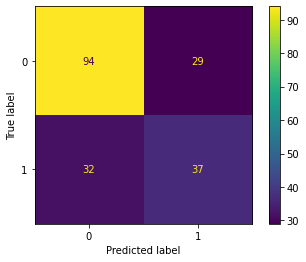

In [ ]:
label=['0','1']
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()

# Creating Nave bayes Algorithm

Model creation using Gaussian nave bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier2=GaussianNB()
classifier2.fit(xtrain,ytrain)
ypred2=classifier2.predict(xtest)
ypred2

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
result2=confusion_matrix(ytest,ypred2)
result2

array([[94, 29],
       [22, 47]])

In [ ]:
score2=accuracy_score(ytest,ypred2)
score2*100

73.4375

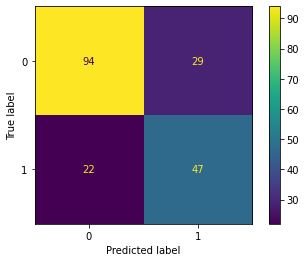

In [ ]:
cmd2=ConfusionMatrixDisplay(result2,display_labels=label)
cmd2.plot()

# Create Support Vector Machine Algorithm

Model creation

In [ ]:
from sklearn.svm import SVC
classifier3=SVC()
classifier3.fit(xtrain,ytrain)
ypred3=classifier3.predict(xtest)
ypred3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
result3=confusion_matrix(ytest,ypred3)
result3

array([[101,  22],
       [ 30,  39]])

In [ ]:
score3=accuracy_score(ytest,ypred3)
score3*100

72.91666666666666

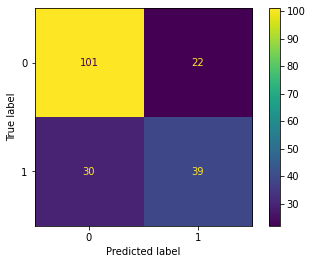

In [ ]:
cmd3=ConfusionMatrixDisplay(result3,display_labels=label)
cmd3.plot()

In [ ]:
print("KNN predicted model creates an accuracy score of :",score*100,"%")
print("NaveBayes predicted model creates an accuracy score of:",score2*100,"%")
print("Support vector Machine predicted model creates an accuracy score of:",score3*100,"%")

KNN predicted model creates an accuracy score of : 68.22916666666666 %
NaveBayes predicted model creates an accuracy score of: 73.4375 %
Support vector Machine predicted model creates an accuracy score of: 72.91666666666666 %
